In [3]:
# Almgren-Chriss Framework through Dynamic Programming
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


In [4]:
# Utilities
def h(x, alpha, eta):
    return eta * x ** (alpha)

def g(x, beta, gamma):
    return gamma * x ** (beta)

def H(x,n,psi,alpha,beta,gamma,eta,sigma=0.3,tau=1):
    """
    Hamiltonian equation. To be minimized through dynamic programming.
    """
    res = psi*n*g(n/tau,beta,gamma) + psi*(x-n)*tau*h(n/tau,alpha,eta) + 0.5*(psi**2)*(sigma**2)*tau*((x-n)**2)
    return res

Dynamic Programming: A simplified version
Bellman equation with change of variable

In [28]:
def dynamic_programming(nb_T, X_total, psi, alpha, beta, gamma, eta, plot='True'):
    
    """
    MODEL
    - Bellman equation and value iteration for solving the Markov
      Decision Process of the Almgren-Chriss model.
    
    INPUTS
    - nb_T,       number of time steps
    - X_total,    number of shares to be liquidated
    - psi,        risk aversion
    """
    
    ### Initialization
    u = np.zeros(shape=(nb_T, X_total+1), dtype="float64")      # value function
    b = np.zeros(shape=(nb_T, X_total+1), dtype="int")          # best move
    inventoryforX = np.zeros(shape=(nb_T,1), dtype="int")       # evolution of inventory
    inventoryforX[0] = X_total
    N = []                                                      # optimal selling trajectory
    tau = 1
    
    ### Market microstructure: volatility, correlation
    ### [insert dynamic volatility data]
    
    ### Terminal condition
    for x in range(X_total+1):
        u[nb_T - 1, x] = np.exp(x * h(x/tau, alpha, eta))
        b[nb_T - 1, x] = x
    
    ### Backwards induction
    for t in range(nb_T-2, -1, -1):
        for x in range(X_total+1):
            
            best_value = u[t+1,0] * np.exp(H(x, x, psi, alpha, beta, gamma, eta))
            best_n = x
            
            for n in range(x):
                # We compute the utility function if we sell n shares
                current_value = u[t+1,x-n] * np.exp(H(x, n, psi, alpha, beta, gamma, eta))
                
                if current_value < best_value:
                    best_value = current_value
                    best_n = n   # nb of shares to liquidate
               
            u[t,x] = best_value
            b[t,x] = best_n
    
    ### Optimal trajectory
    for t in range(1, nb_T):
        inventoryforX[t] = inventoryforX[t-1] - b[t,inventoryforX[t-1]]
        N.append(b[t,inventoryforX[t-1]])
    
    N = np.asarray(N)
    
    ### Plot results
    if plot:
        plt.figure(figsize=(7,5))
        plt.plot(inventoryforX, color='blue', lw=1.5)
        plt.xlabel('Trading periods')
        plt.ylabel('Number of shares')
        plt.grid(True)
        plt.show()
    
    return u, b, inventoryforX, N

Different levels of risk, i.e., $\psi$

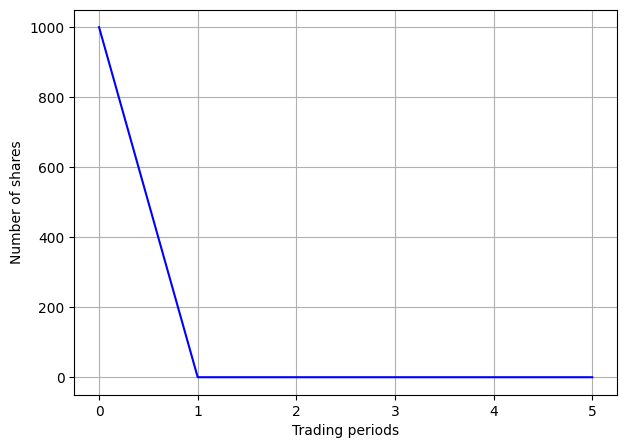

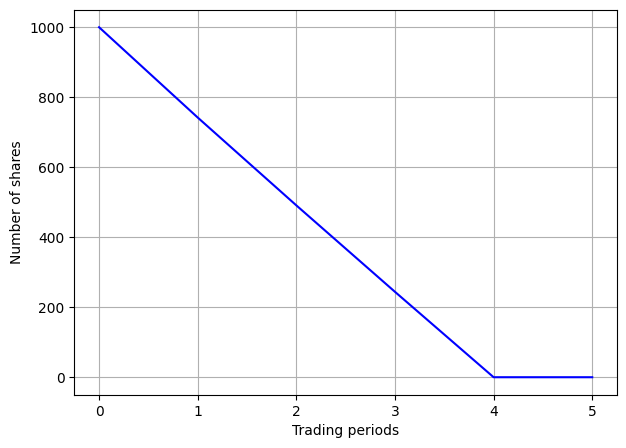

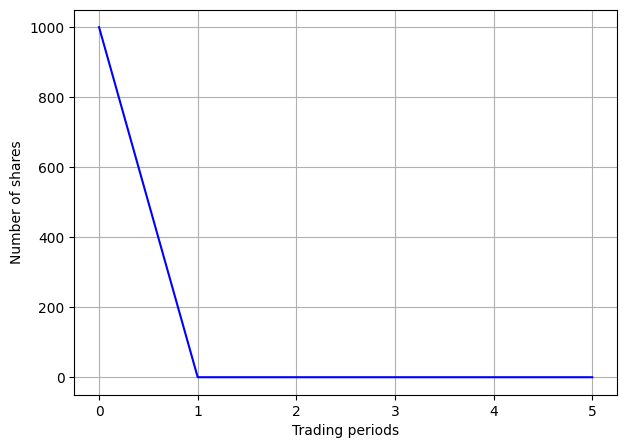

[[1000]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]]
[[1000]
 [ 742]
 [ 491]
 [ 244]
 [   0]
 [   0]]
[[1000]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]]


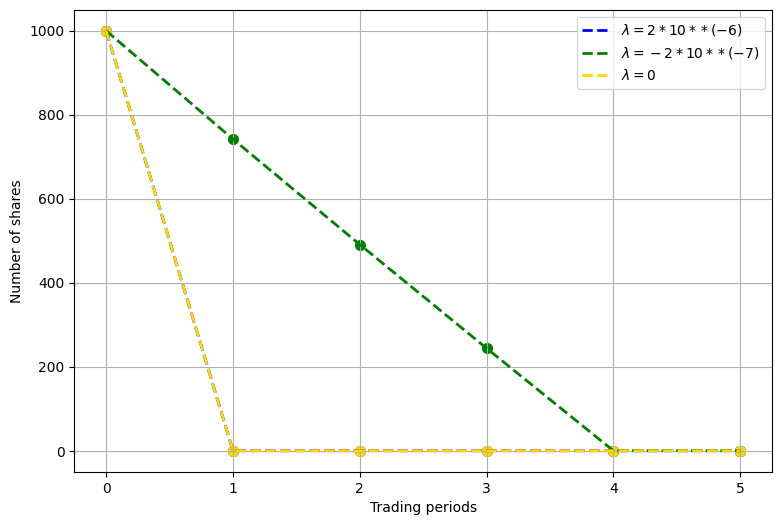

In [33]:
u1, b1, p1, N1 = dynamic_programming(nb_T=6, X_total=1000, psi=2*10**(-6), alpha=1, beta=1, gamma=2.5*10**(-7), eta=2.5*10**(-6), plot='False')
u2, b2, p2, N2 = dynamic_programming(nb_T=6, X_total=1000, psi=-2*10**(-7), alpha=1, beta=1, gamma=2.5*10**(-7), eta=2.5*10**(-6), plot='False')
u3, b3, p3, N3 = dynamic_programming(nb_T=6, X_total=1000, psi=0, alpha=0.02, beta=1, gamma=2.5*10**(-7), eta=2.5*10**(-6), plot='False')
#u4, b4, p4, N4 = dynamic_programming(nb_T=51, X_total=500, psi=0.05, alpha=1, beta=1, gamma=0.05, eta=0.05, plot='False')
print(p1)
print(p2)
print(p3)

plt.figure(figsize=(9,6))
plt.plot(p1, color='blue', lw=2, label='$\lambda=2*10**(-6)$', linestyle ='dashed')
plt.plot(p2, color='green', lw=2, label='$\lambda=-2*10**(-7)$', linestyle ='dashed')
plt.plot(p3, color='gold', lw=2, label='$\lambda=0$', linestyle ='dashed')
plt.scatter(np.arange(0, 6), p1, color='blue', lw=2)
plt.scatter(np.arange(0, 6), p2, color='green', lw=2)
plt.scatter(np.arange(0, 6), p3, color='gold', lw=2)
#plt.plot(p4, color='crimson', lw=2, label='$\psi=0.05$')

plt.xlabel('Trading periods')
plt.ylabel('Number of shares')
plt.legend(loc='best')
#plt.title('$\gamma=0.05$, $\eta=0.05$')
plt.grid(True)
plt.savefig('DP1.png')
plt.show()